In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# importing libraries for balancing the imbalanced class 
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from collections import Counter

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df=pd.read_csv('travel insurance.csv',sep=',')
row,column=df.shape
print("The dataset has {} Rows and {} Columns".format(row,column))

The dataset has 63326 Rows and 11 Columns


#Feature Descriprion

In [ ]:
cols=list(df.columns)
continous=list(df._get_numeric_data().columns)
print("Columns : ",cols)
print("Continous Variables   : ",continous)
categorical=list(set(cols)-set(continous))
print("Categorical Variables : ",categorical)

Columns :  ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Gender', 'Age']
Continous Variables   :  ['Duration', 'Net Sales', 'Commision (in value)', 'Age']
Categorical Variables :  ['Gender', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Claim', 'Destination']


* ***Agency*** contains the name of agency
* ***Agency Type*** contains the type of travel insurance agencies
* ***Distribution channel*** conatins the distribution channel of travel insurance agencies 
* ***Product Name*** contains the travel insurance products 
* ***Claim*** contains whether insurance claim has been approved or not
* ***Duration*** contains the duration of travel 
* ***Destination*** contains the destination of travel
* ***Net Sales*** contains the amount of sales of travel insurance policies
* ***Commission (in value)*** is the ommission received for travel insurance agency
* ***Gender*** is the gender of the insured person
* ***Age*** is the age of the insured person


In [ ]:
#number of times a particular values appers in the dateset
for i in categorical:
  print("\nFor column ** "+i+" **")
  print(df[i].value_counts())


For column ** Gender **
M    9347
F    8872
Name: Gender, dtype: int64

For column ** Agency **
EPX    35119
CWT     8580
C2B     8267
JZI     6329
SSI     1056
JWT      749
RAB      725
LWC      689
TST      528
KML      392
ART      331
CCR      194
CBH      101
TTW       98
CSR       86
ADM       82
Name: Agency, dtype: int64

For column ** Agency Type **
Travel Agency    45869
Airlines         17457
Name: Agency Type, dtype: int64

For column ** Distribution Channel **
Online     62219
Offline     1107
Name: Distribution Channel, dtype: int64

For column ** Product Name **
Cancellation Plan                       18630
2 way Comprehensive Plan                13158
Rental Vehicle Excess Insurance          8580
Basic Plan                               5469
Bronze Plan                              4049
1 way Comprehensive Plan                 3331
Value Plan                               2715
Silver Plan                              2249
Annual Silver Plan                       1423
T

# Visualising the data 

## Univariate Analysis

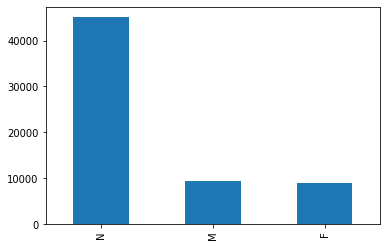

In [ ]:
df_=df.copy()
df_['Gender']=df_['Gender'].fillna('N')
df_['Gender'].value_counts().plot(kind='bar')
# plot show that there are approximately equal number of Male and Female 
# Dataset contains very large amount of Null Value herein reperesented as N  

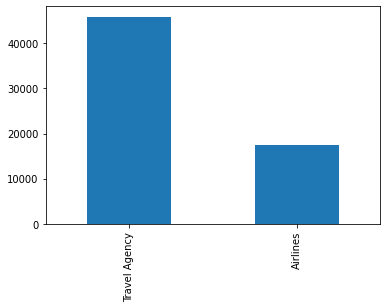

In [ ]:
df['Agency Type'].value_counts().plot.bar()
#There are more than double number of Travel Agency as compared to Airlines 
# which shows that people prefer Travel Agency more than Airlines 

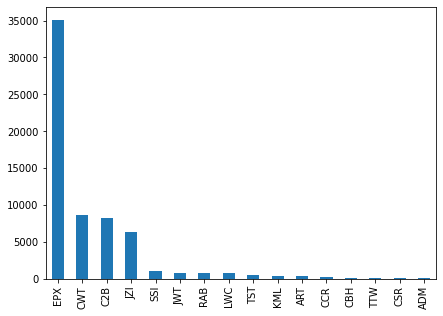

In [ ]:
df['Agency'].value_counts().plot.bar(figsize=[7,5])

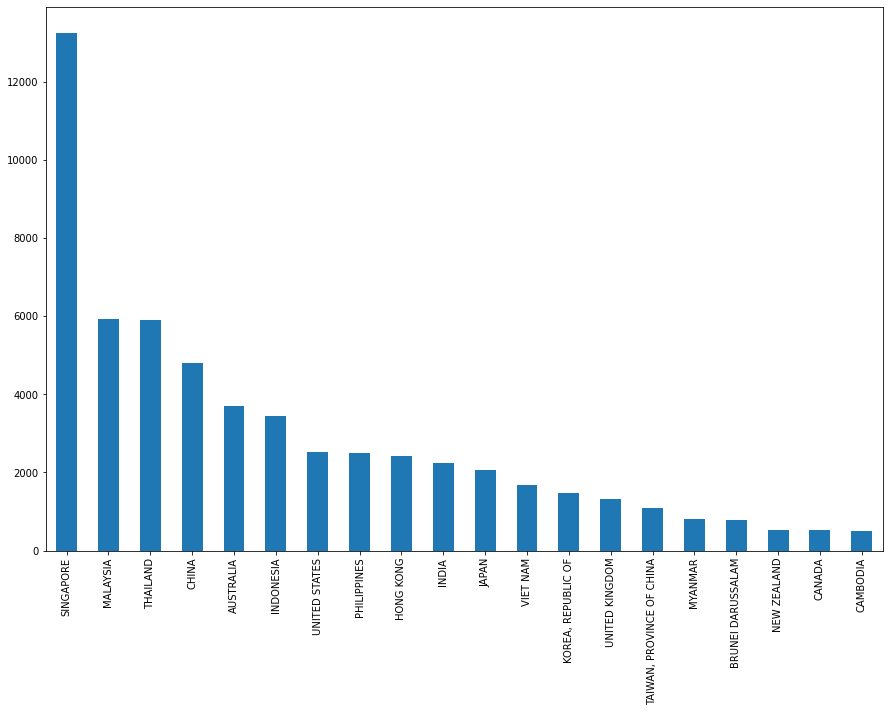

In [ ]:
d=df['Destination'].value_counts()[:20]
d.plot.bar(figsize=[15,10])

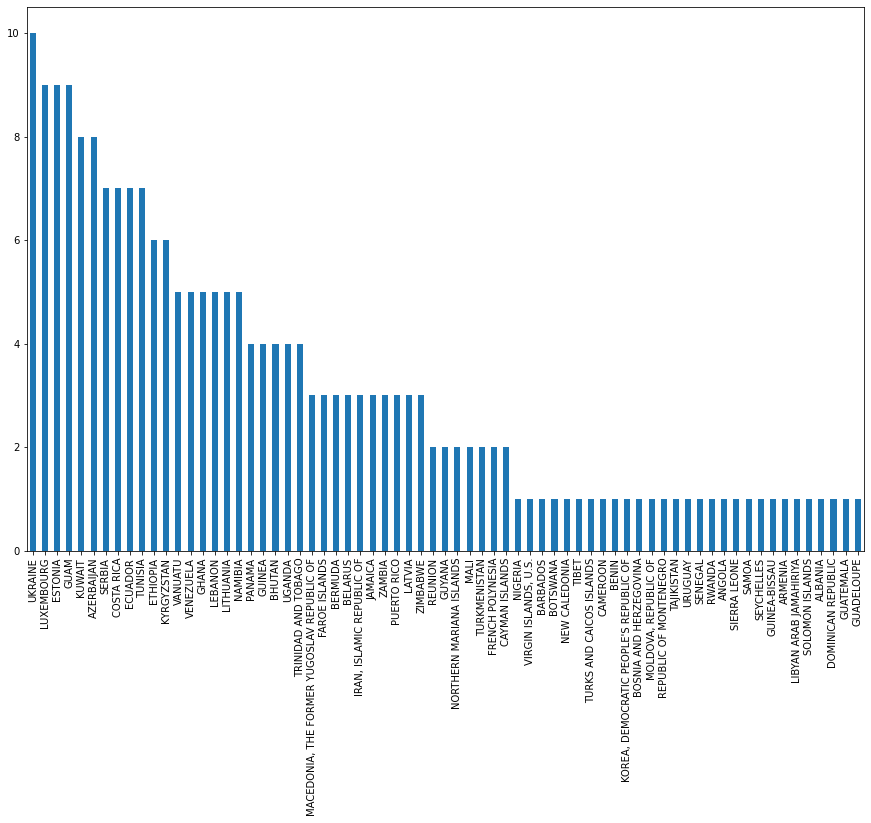

In [ ]:
d=df['Destination'].value_counts()[80:]
d.plot.bar(figsize=[15,10])

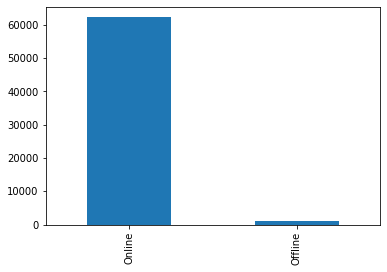

In [ ]:
df['Distribution Channel'].value_counts().plot.bar()

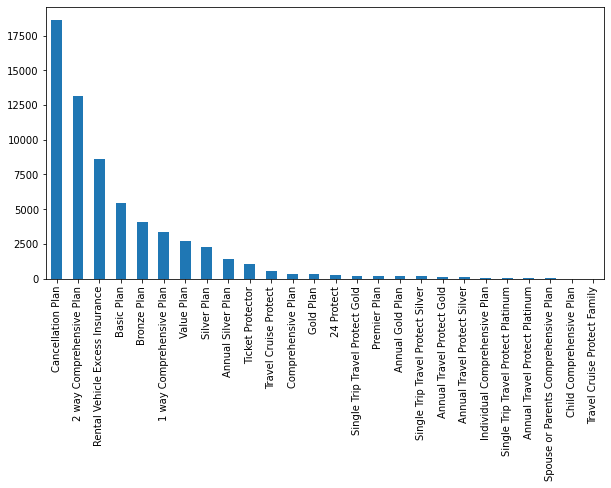

In [ ]:
df['Product Name'].value_counts().plot.bar(figsize=[10,5])

##Bivariate Anaylsis

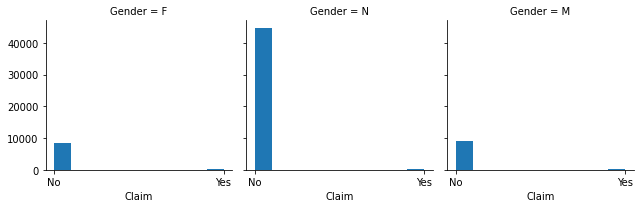

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
fg = sns.FacetGrid(df_, col="Gender")
fg.map(plt.hist, 'Claim')


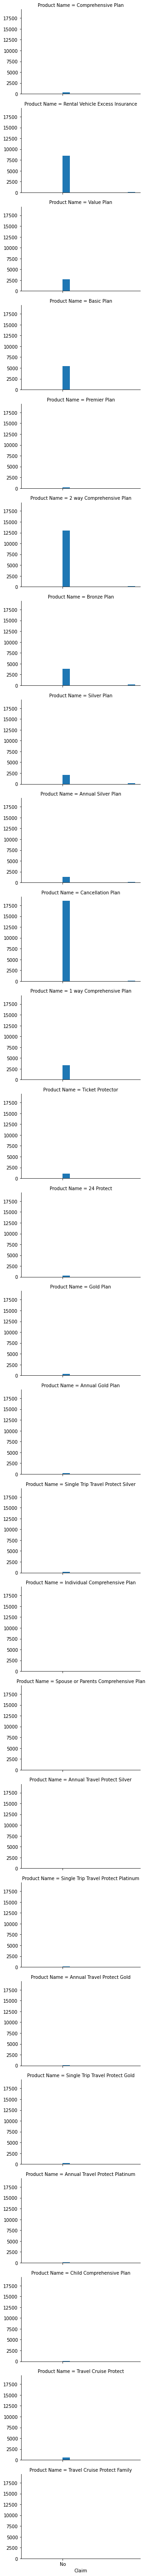

In [ ]:
fg=sns.FacetGrid(df,row="Product Name",height=3,aspect=1.5)
fg=fg.map(plt.hist,"Claim")
# Out of all the Products, Cancellation Plan has the highest number of records 
# Out of all the products, Silver plan has the highest approved claims 
# Cancellation , Silver, Annual Silver, Bronze, 2 way Comprehensive and Rental Vehicle Excess Insurance are the ones which have some with approved claims
# Individual Comprehensive, Spouse or Parent Comprehensive, Annual travel protect silver don't have any entry in the dataset

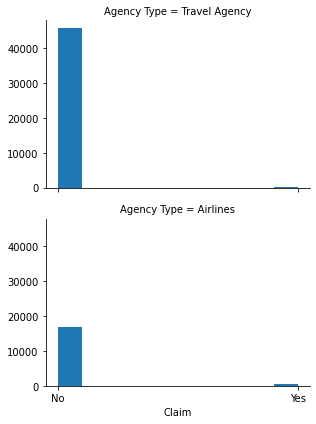

In [ ]:
fg =sns.FacetGrid(df,row="Agency Type",height=3,aspect=1.5)
fg = fg.map(plt.hist,"Claim")
#Airlines are accepted more in comparision of Travel agency 

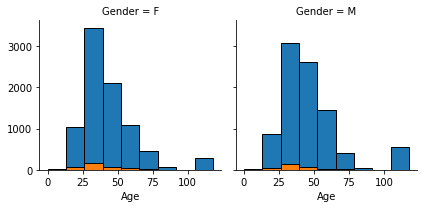

In [ ]:
bins = np.linspace(df.Age.min(), df.Age.max(),10)
fg = sns.FacetGrid(df, col='Gender',hue='Claim', col_wrap=2)
fg.map(plt.hist, 'Age', bins=bins, ec='k')
# Female's age with approved claim ranges from 15 to 60, with highest at 25-35 age 
# Male's age with approved claim ranges from  15 to 50, wtih highest ar 25-30 age
# Both male and female with age >100 has no approved claim ( this value may be an outlier)

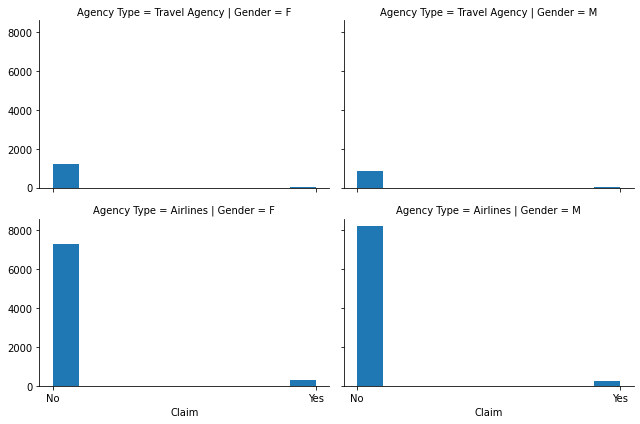

In [ ]:
fg =sns.FacetGrid(df,row="Agency Type",col="Gender",height=3,aspect=1.5)
fg = fg.map(plt.hist,"Claim")

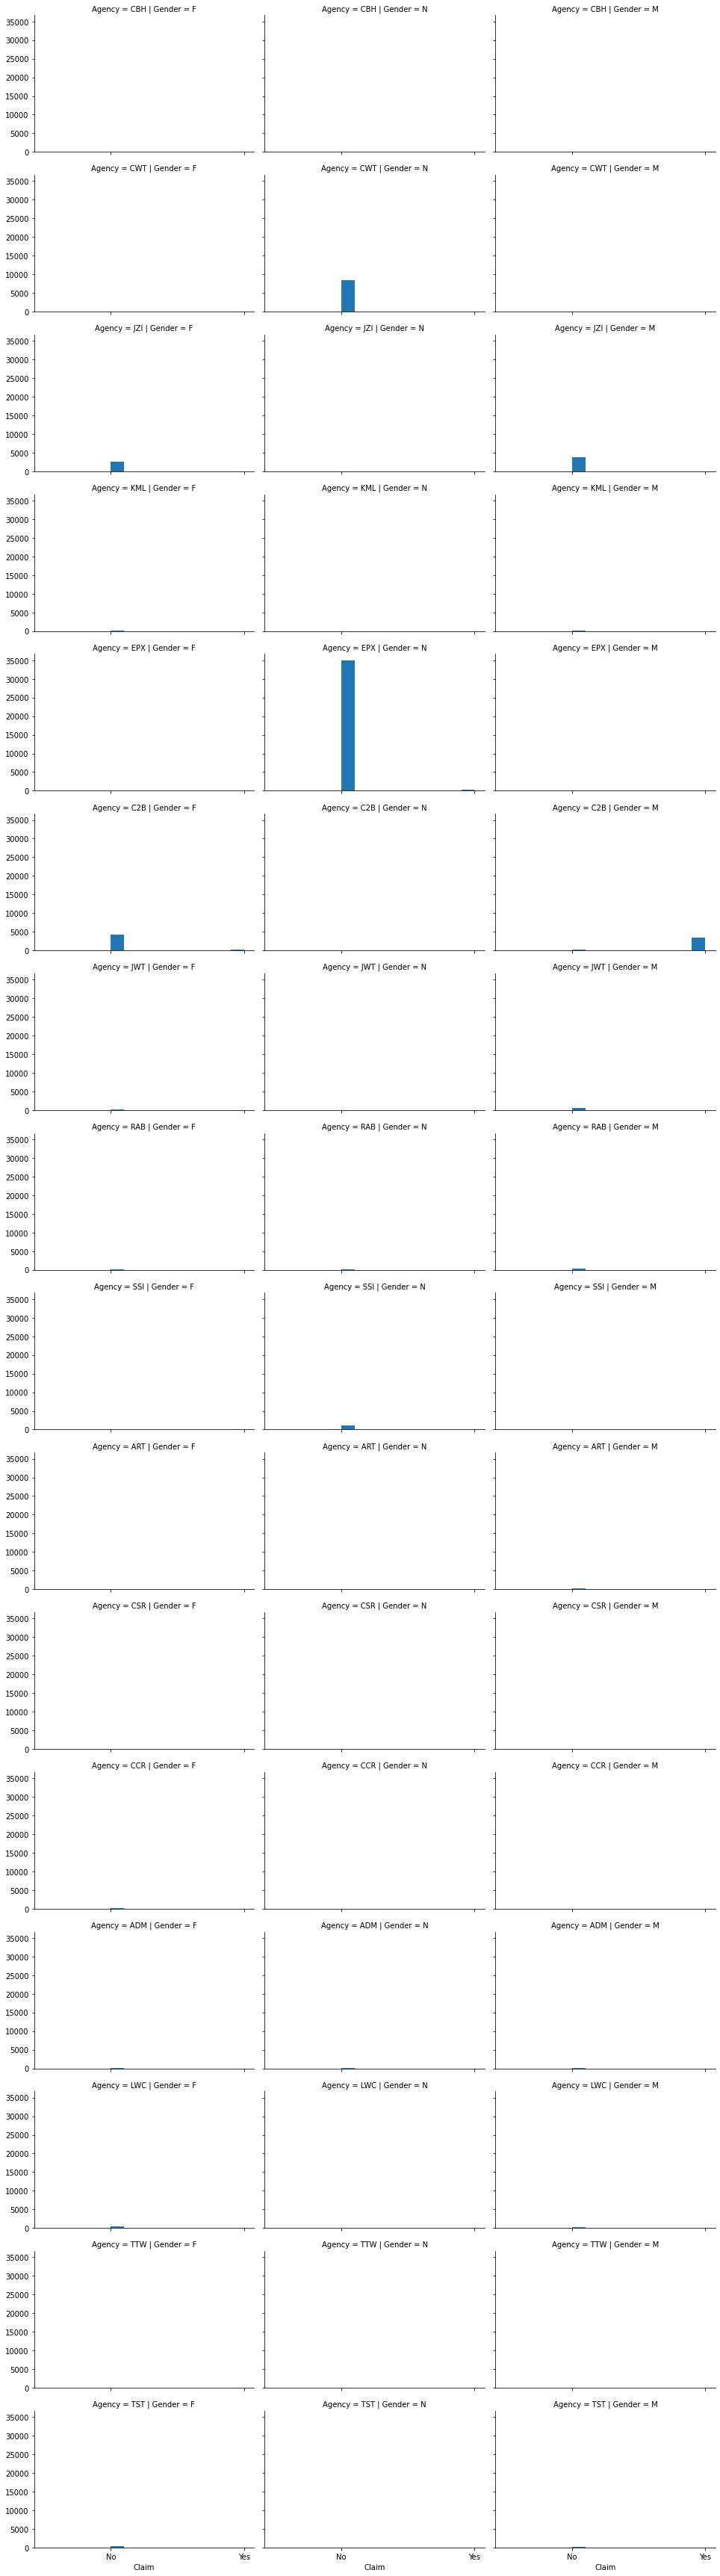

In [ ]:
fg =sns.FacetGrid(df_,row="Agency",col="Gender",height=3,aspect=1.5)
fg = fg.map(plt.hist,"Claim")
# Males has more approved claim compared with females in C2B agency.

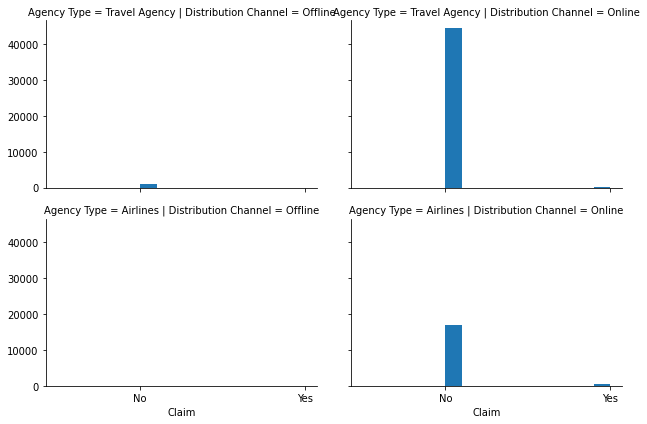

In [ ]:
fg =sns.FacetGrid(df,row="Agency Type",col="Distribution Channel",height=3,aspect=1.5)
fg = fg.map(plt.hist,"Claim")
#1 Airlines don't have any Offline distribution channel
#2 All the Travel agency with Offline channel are rejected or not filed the claim
#3 Travel agency with Online channel has some approved claim but majority are still rejected
#4 Airlines with online channel has more approved cases compared to Travel-Online.

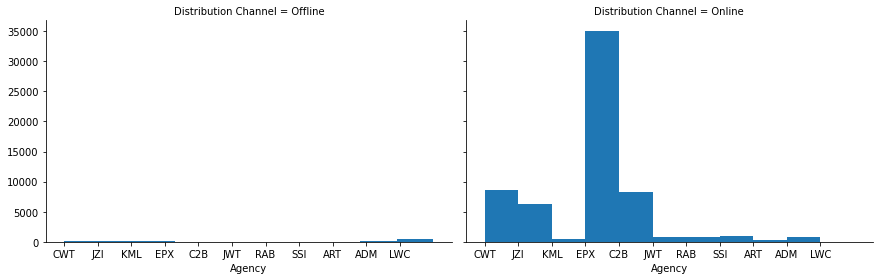

In [ ]:
fn = sns.FacetGrid(df,col='Distribution Channel',col_wrap=4,height=4,aspect=1.5)
fn = fn.map(plt.hist,'Agency')
# 1. The majority of agencies worked in online distribution channel than the offline ones
# 2. There are more females in offline distribution channel & more males in online distribution channel

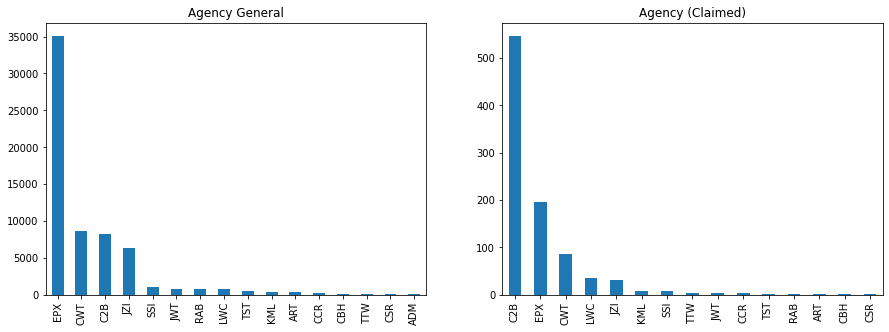

In [ ]:
df_claim=df[df['Claim']=='Yes']
f, axes = plt.subplots(1, 2)
f.set_size_inches(15,5)
axes[0].set_title('Agency General')
axes[1].set_title('Agency (Claimed)')
df['Agency'].value_counts().plot.bar(ax=axes[0])
df_claim['Agency'].value_counts().plot.bar(ax=axes[1])

# EPX has the maximum number of records in the dataset 
# C2B has the maximum approved claim

#Feature Engineering

In [ ]:
for i in continous:
  print(i+"\t",len(df[i].unique()))
#since age has less number of unique values in the dataset, so it is better to treat it as categorical variable

Duration	 455
Net Sales	 1139
Commision (in value)	 1035
Age	 89


In [ ]:
df.skew()

Duration                23.179617
Net Sales                3.272373
Commision (in value)     4.032269
Age                      2.987710
dtype: float64

In [ ]:
# High skew of Duration indicates that it is a categorical varible 
for i in ['Duration','Age']:
  categorical.append(i)
  continous.remove(i)
print("Continous Variables   : ",continous)
print("Categorical Variables : ",categorical)

Continous Variables   :  ['Net Sales', 'Commision (in value)']
Categorical Variables :  ['Gender', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Claim', 'Destination', 'Duration', 'Age']


## Outlier Handling

In [ ]:
# Since Age has values >118 it is an outlier so we'll delete it 
# There are some values <=0 in Duration which is not possible so we'll delete them too
# When net sales = 0 then Commision will also be 0
df_=df.copy()
df_ = df_[df_.Age != 118]
df_ = df_[df_.Duration >=0]
df_.loc[df_['Net Sales'] == 0.0, 'Commision (in value)'] = 0

## Missing Values Handling 

In [ ]:
for i in df_.columns:
  print(df_[i].isnull().sum(),'\t',i)

0 	 Agency
0 	 Agency Type
0 	 Distribution Channel
0 	 Product Name
0 	 Claim
0 	 Duration
0 	 Destination
0 	 Net Sales
0 	 Commision (in value)
44964 	 Gender
0 	 Age


In [ ]:
df_['Gender']=df_['Gender'].fillna('N')
#imputing the null values with 'N'

In [ ]:
# row,column=df_.shape
print("Now the dataset  has {} Rows and {} Columns".format(row,column))
print("%d records deleted from the dataset"%(df.shape[0]-row))
df_=df_.reset_index().drop(columns='index')

Now the dataset  has 63326 Rows and 11 Columns
0 records deleted from the dataset


## Encoding

In [ ]:
# Label Encoding

le=LabelEncoder()
le_df=pd.DataFrame()
for i in list(set(df_.columns)-set(df_._get_numeric_data().columns)):
  le_df[i]=le.fit_transform(df_[i])
for j in list(df_._get_numeric_data().columns):
  le_df[j]=df_[j]
print("Label Encoded dataset  has {} Rows and {} Columns".format(le_df.shape[0],le_df.shape[1]))

Label Encoded dataset  has 62342 Rows and 11 Columns


In [ ]:
# To get the name of the values that corresponds to the lable after encoding
relation=dict()
for l in list(set(df_.columns)-set(df_._get_numeric_data().columns)):
  indx=[]
  for x in df_[l].unique():
    #print(x,' ',df_.index[df_[l] == x].tolist()[0])
    indx.append(df_.index[df_[l] == x].tolist()[0])
  dic=dict(zip(le_df.loc[indx][l].to_list(),df_.loc[indx][l].to_list()))
  relation[l]=dic
  #print(dic)

In [ ]:
#OneHotEncoding
ohe=OneHotEncoder()
ohe_df=df_.copy()
for i in list(set(df_.columns)-set(df_._get_numeric_data().columns)-{'Claim'}):
  ohe_df = pd.get_dummies(ohe_df, columns=[i], prefix=[i] )
ohe_df=ohe_df.drop(columns='Claim')
print("One Hot Encoded dataset  has {} Rows and {} Columns".format(ohe_df.shape[0],ohe_df.shape[1]))

One Hot Encoded dataset  has 62342 Rows and 199 Columns


# Functions 

In [ ]:
# Function to print the result and ROC curve after the prediction 
def print_result(y_test,y_pred):
  print("Confusion Matrix       : \n" ,confusion_matrix(y_test,y_pred))
  print("Accuracy of Model      : ",accuracy_score(y_test, y_pred))
  print("Precision of Model     : ",precision_score(y_test, y_pred))
  print("Recall of Model        : " , recall_score(y_test, y_pred))
  print("F1 Score of Model      : " ,f1_score(y_test, y_pred))
  print("ROC_AUC score of Model : " ,roc_auc_score(y_test,y_pred))	
  fpr, tpr, thresholds = roc_curve(y_test,y_pred)
  plt.figure(1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(y_test,y_pred))
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='best')

In [ ]:
# Funtion to print the details of training and testing data after train-test split
def print_input(X_train, X_test, y_train, y_test):
  print("TRAIN(X_train) Feature set        : ",len(X_train))
  print("TRAIN(y_train) Label Feature set  : ",len(y_train))
  print("TEST (X_test)  Feature set        : ",len(X_test))
  print("TEST (y_test)  Label set          : ",len(y_test))
  print("-------For Training Set--------\n")
  print(y_train['Claim'].value_counts())
  l_1,l_2= y_train['Claim'].value_counts()
  print("Class Label 0 is : ",(l_1/y_train.shape[0])*100,"%")
  print("Class Label 1 is : ",(l_2/y_train.shape[0])*100,"%")
  print("\n-------For Testing Set--------\n")
  print(y_test['Claim'].value_counts())
  l_1,l_2= y_test['Claim'].value_counts()
  print("Class Label 0 is : ",(l_1/y_test.shape[0])*100,"%")
  print("Class Label 1 is : ",(l_2/y_test.shape[0])*100,"%")

In [ ]:
# Function to balance the imbalanced classes 
def balance(X_train,y_train,typ,s=0.3):
  if(typ.lower() == 'ros'):
    rus=RandomOverSampler(random_state=21)
    x_res, y_res = rus.fit_sample(X_train, y_train)
    print('Dataset shape after Random Over Sampling', Counter(y_res))
    print('After ROS the number of Rows Training set has are  : ', x_res.shape[0])
  elif(typ.lower() == 'rus' ):
    ros=RandomUnderSampler(random_state=21)
    x_res, y_res = ros.fit_sample(X_train, y_train)
    print('Dataset shape after Random Under Sampling', Counter(y_res))
    print('After RUS the number of Rows Training set has are : ', x_res.shape[0])
  elif(typ.lower() == 'adasyn'):
    ada=ADASYN(random_state=21, sampling_strategy=s, n_jobs=-1)
    x_res, y_res = ada.fit_sample(X_train, y_train)
    print('Dataset shape after ADASYN', Counter(y_res))
    print('After ADASYN the number of Rows Training set has are : ', x_res.shape[0])
  elif(typ.lower() == 'smote'):
    smo=SMOTE(random_state=21, sampling_strategy=s, n_jobs=-1)
    x_rs, y_rs = smo.fit_sample(X_train, y_train)
    tom=TomekLinks(random_state=21)
    x_res, y_res = tom.fit_sample(x_rs,y_rs)
    print('Dataset shape after SMOTE + Tomek Links', Counter(y_res))
    print('After SMOTE Tomek the number of Rows Training set has are : ', x_res.shape[0])
  return x_res, y_res

In [ ]:
# Function to plot the scatter plot of values it get by applying PCA
def plt_scatter(tmp_sample):
  plt.figure(figsize=(10,10))
  sns.scatterplot(x='Component 1',y='Component 2', hue='Label', data=tmp_sample)
  plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

In [ ]:
# Function to count the number of elements with Label 1 and Lable 0
def plt_print(temp):
  tmp_sample = temp.sample(frac = 0.10, random_state=21)
  tmp_sample = tmp_sample[tmp_sample['Component 1'] < 0.90 ]
  print(tmp_sample['Label'].value_counts())
  l_1,l_2= tmp_sample['Label'].value_counts()
  print("Class Label 0 is : ",(l_1/tmp_sample.shape[0])*100,"%")
  print("Class Label 1 is : ",(l_2/tmp_sample.shape[0])*100,"%")
  print(" ")
  plt_scatter(tmp_sample)

In [ ]:
# Function to plot the graph 
def plot_graph(X_train,y_train):
  pca=PCA(n_components=2) 
  dim=pca.fit_transform(X_train)
  scaler=MinMaxScaler()
  res=scaler.fit_transform(dim)
  temp= pd.DataFrame(res,columns=['Component 1', 'Component 2'])
  y_temp=y_train.copy()
  y_temp=y_temp.reset_index()
  temp['Label'] = y_temp['Claim']
  plt_print(temp)

In [ ]:
# Function to plot the graph 
def plt_graph(X_train,y_train):
  pca=PCA(n_components=2) 
  dim=pca.fit_transform(X_train)
  scaler=MinMaxScaler()
  res=scaler.fit_transform(dim)
  temp= pd.DataFrame(res,columns=['Component 1', 'Component 2'])
  y_temp=y_train.copy()
  temp['Label'] = y_temp
  plt_print(temp)

In [ ]:
# Function to plot the mapping of 4 Buckets 
def plot_buk(val,new_dff):
  nn=[['TP','TN'],['FP','FN']]
  f, axes = plt.subplots(2, 2)
  f.set_size_inches(15,10)
  for i in range(2):
    for j in range(2):
      sns.countplot(x=val,hue=nn[i][j],data=new_dff,ax=axes[i][j])
      sns.countplot(x=val,hue=nn[i][j],data=new_dff,ax=axes[i][j])
      sns.countplot(x=val,hue=nn[i][j],data=new_dff,ax=axes[i][j])
      sns.countplot(x=val,hue=nn[i][j],data=new_dff,ax=axes[i][j])

In [ ]:
# Function to Compare all the four buckets ( TP, TN, FP, FN) of the top 10% imp features
def comp_feat(X_test,y_test,y_pred,f=0):
  new=X_test.copy()
  new=new.reset_index()
  new=new.drop(columns='index')
  new['Actual']=y_test.values
  new['Predicted']=y_pred
  for i in range(0,len(new)):
    if   (int(new.iloc[i]['Actual']) == 1 and int(new.iloc[i]['Predicted']) == 1 ):
      new.loc[i,'TP'] = 1
    elif (int(new.iloc[i]['Actual']) == 1 and int(new.iloc[i]['Predicted']) == 0 ):
      new.loc[i,'FN'] = 1
    elif (int(new.iloc[i]['Actual']) == 0 and int(new.iloc[i]['Predicted']) == 1 ):
      new.loc[i,'FP'] = 1
    elif (int(new.iloc[i]['Actual']) == 0 and int(new.iloc[i]['Predicted']) == 0 ):
      new.loc[i,'TN'] = 1
  if (f==0):
    new=new.fillna(0)
  return(new)  

In [ ]:
# Tagert variable 
target = pd.DataFrame(le_df['Claim'])
le_df=le_df.drop(columns='Claim')

# Class balancing plots

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ohe_df,target,test_size = 0.25, random_state = 21, stratify = target)
print_input(X_train, X_test, y_train, y_test)
print("\n********Balancing the imbalanced class********\n")
print("\nRandom Under Sampling")
X_u_train, y_u_train = balance(X_train, y_train.values.ravel(),'rus')
print("\nRandom Over Sampling")
X_o_train, y_o_train = balance(X_train, y_train.values.ravel(),'ros')
print("\nSMOTE + Tomek Links (sampling_strategy = 0.3)")
X_s_train, y_s_train = balance(X_train, y_train.values.ravel(),'smote')
print("\nADASYN (sampling_strategy = 0.3)")
X_a_train, y_a_train = balance(X_train, y_train.values.ravel(),'adasyn')

TRAIN(X_train) Feature set        :  46756
TRAIN(y_train) Label Feature set  :  46756
TEST (X_test)  Feature set        :  15586
TEST (y_test)  Label set          :  15586
-------For Training Set--------

0    46068
1      688
Name: Claim, dtype: int64
Class Label 0 is :  98.52853109761314 %
Class Label 1 is :  1.4714689023868595 %

-------For Testing Set--------

0    15357
1      229
Name: Claim, dtype: int64
Class Label 0 is :  98.53073270884127 %
Class Label 1 is :  1.4692672911587321 %

********Balancing the imbalanced class********


Random Under Sampling
Dataset shape after Random Under Sampling Counter({0: 688, 1: 688})
After RUS the number of Rows Training set has are :  1376

Random Over Sampling


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Dataset shape after Random Over Sampling Counter({0: 46068, 1: 46068})
After ROS the number of Rows Training set has are  :  92136

SMOTE + Tomek Links (sampling_strategy = 0.3)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Dataset shape after SMOTE + Tomek Links Counter({0: 45696, 1: 13820})
After SMOTE Tomek the number of Rows Training set has are :  59516

ADASYN (sampling_strategy = 0.3)
Dataset shape after ADASYN Counter({0: 46068, 1: 14022})
After ADASYN the number of Rows Training set has are :  60090


0    4606
1      70
Name: Label, dtype: int64
Class Label 0 is :  98.50299401197606 %
Class Label 1 is :  1.4970059880239521 %
 


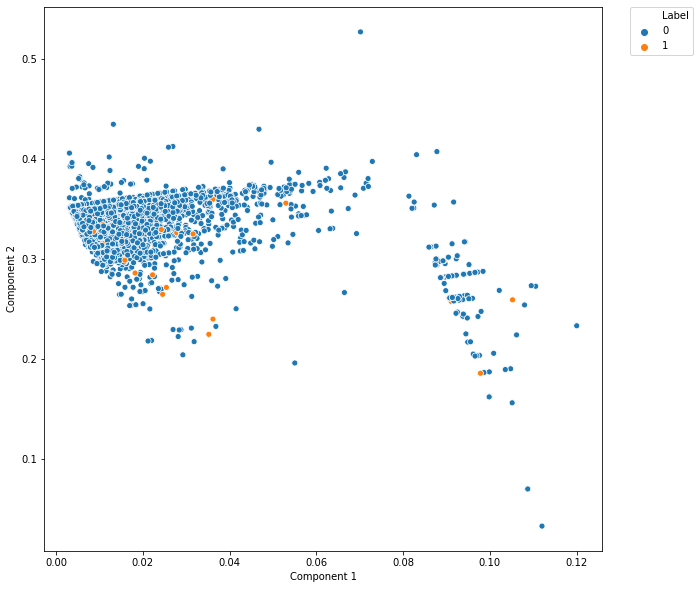

In [ ]:
# No Sampling 
plot_graph(X_train,y_train)

1    69
0    69
Name: Label, dtype: int64
Class Label 0 is :  50.0 %
Class Label 1 is :  50.0 %
 


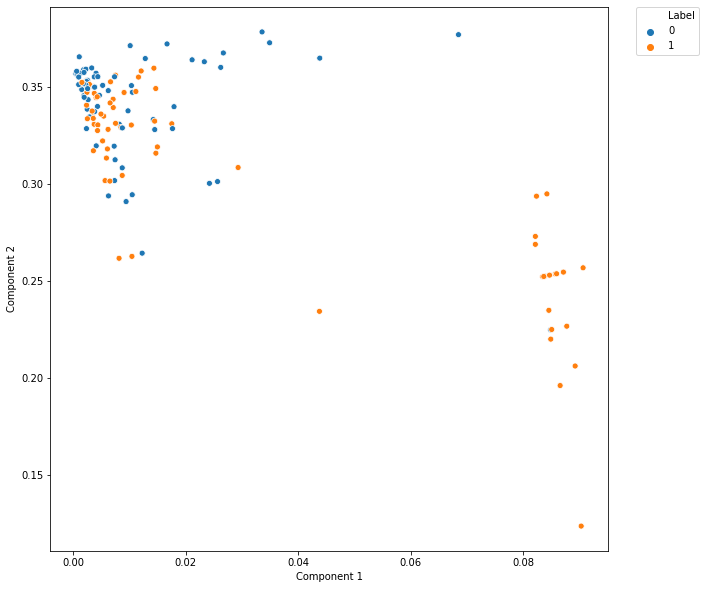

In [ ]:
# Random Under Sampling
plt_graph(X_u_train,y_u_train)

0    4634
1    4578
Name: Label, dtype: int64
Class Label 0 is :  50.30395136778115 %
Class Label 1 is :  49.69604863221885 %
 


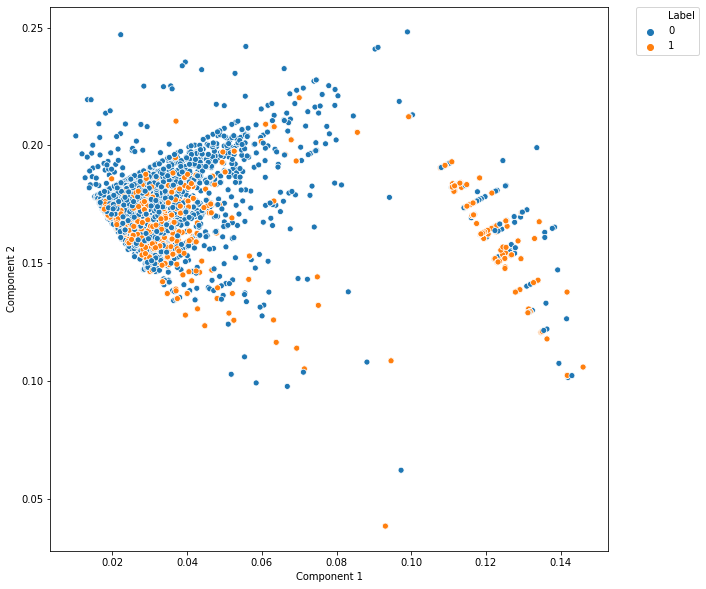

In [ ]:
#Random Over sampling
plt_graph(X_o_train,y_o_train)

0    4532
1    1419
Name: Label, dtype: int64
Class Label 0 is :  76.15526802218115 %
Class Label 1 is :  23.844731977818853 %
 


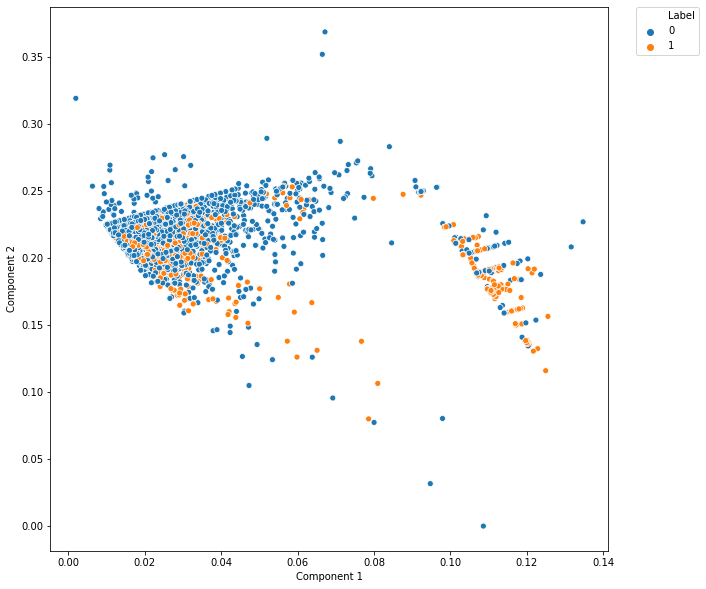

In [ ]:
#SMOTE + Tomek
plt_graph(X_s_train,y_s_train)

0    4548
1    1461
Name: Label, dtype: int64
Class Label 0 is :  75.68647029455816 %
Class Label 1 is :  24.313529705441837 %
 


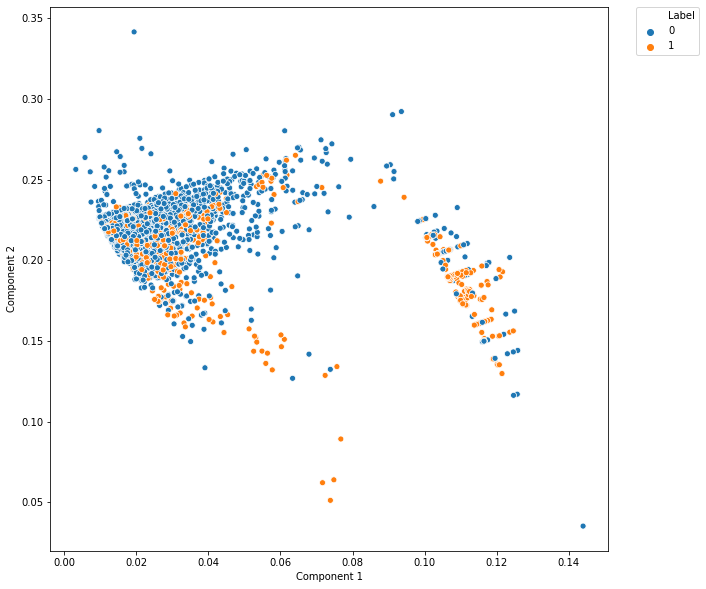

In [ ]:
#ADASYN
plt_graph(X_a_train,y_a_train)

# Feature Importance 
Feature Importance  is done to know the contribution of each feature to the model. 

Here, only top 10% features are represented.

This is done to find the reason behind the prediction and for explaining the model 

In [ ]:
# Tuning the hyperparameters for getting better results.
# The parameters passed in Random forest Classifier are in the param_grid
clf_dt = RandomForestClassifier()
param_grid = {
   'max_leaf_nodes': [ 40,50 ],
   'class_weight' : ['balanced'],
   'criterion' :['gini','entropy'] ,
   'max_depth' : [ 30, 50, 100 ],
   'min_samples_split': [ 2, 3, 4],
   'random_state': [42]
    }

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Confusion Matrix       : 
 [[12557  2800]
 [   70   159]]
Accuracy of Model      :  0.8158603875272681
Precision of Model     :  0.05373436971949983
Recall of Model        :  0.6943231441048034
F1 Score of Model      :  0.09974905897114178
ROC_AUC score of Model :  0.7559979333208786


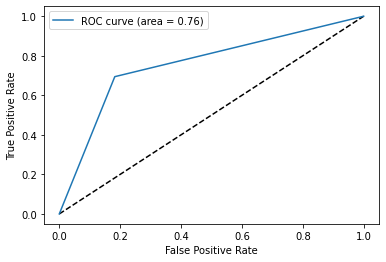

In [ ]:
# Using GridSearchCV for hyperparameter tuning
CV_dt = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv= 3)
CV_dt.fit(X_u_train, y_u_train)
clf_best_dt = CV_dt.best_estimator_
print(clf_best_dt)
y_pred = clf_best_dt.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

In [ ]:
# Creating a dataframe containing the features contributing top 10% in the model prediction and the corresponding percentage they've been contributing.
hyp=pd.DataFrame({'Percent' : clf_best_dt.feature_importances_ , 'Top 10% Features' : ohe_df.columns}).sort_values(by='Percent',ascending=False)
hyp[:19]

,Percent,Top 10% Features
9,0.129557,Agency_C2B
1,0.124166,Net Sales
2,0.084718,Commision (in value)
0,0.082938,Duration
169,0.070835,Destination_SINGAPORE
6,0.061791,Gender_N
14,0.052357,Agency_EPX
3,0.039426,Age
36,0.037888,Product Name_Cancellation Plan
23,0.036116,Agency Type_Travel Agency


In [ ]:
h=hyp['Top 10% Features'][0:19].to_list()

# Comparing Feature Importance for each TP, TN, FP, FN
It is to infer that how much a feature contribute to a particular bucket [ TP, TN, FP, FN ]. 

In [ ]:
# calling comp_feat(X_test,y_test,y_pred) which returns a dataframe that has the computed values for each bucket
new_df=comp_feat(X_test,y_test,y_pred)

In [ ]:
# Appending the columns for true positve, true negative, false positive and false negative with actual and predicted values for the comparison of features 
n=['TP','TN','FP','FN','Actual','Predicted']
for i in n:
  h.append(i)
new_df=new_df[h]


In [ ]:
# calling comp_feat(X_test,y_test,y_pred,1) function which returns a dataframe
# that has the computed values for each bucket and add NaN values where the values
# is not 1 in TP ,TN, FP, FN
new_dff=comp_feat(X_test,y_test,y_pred,1)

In [ ]:
new_dff=new_dff[h]
new_dff  # replace 0 with NaN, so as to plot them in graphs for the finding the patterns.
# NaN value aren't plotted in plot 

,Agency_C2B,Net Sales,Commision (in value),Duration,Destination_SINGAPORE,Gender_N,Agency_EPX,Age,Product Name_Cancellation Plan,Agency Type_Travel Agency,Agency Type_Airlines,Agency_JZI,Gender_F,Product Name_Bronze Plan,Product Name_Annual Silver Plan,Product Name_Basic Plan,Product Name_2 way Comprehensive Plan,Gender_M,Agency_LWC,TP,TN,FP,FN,Actual,Predicted
0,0,20.0,0.00,21,0,1,1,34,0,1,0,0,0,0,0,0,1,0,0,NaN,1.0,NaN,NaN,0,0
1,0,24.0,0.00,47,0,1,1,36,0,1,0,0,0,0,0,0,1,0,0,NaN,1.0,NaN,NaN,0,0
2,0,-59.4,35.64,61,0,1,0,60,0,1,0,0,0,0,0,0,0,0,0,NaN,1.0,NaN,NaN,0,0
3,0,80.0,0.00,63,0,1,1,36,1,1,0,0,0,0,0,0,0,0,0,NaN,1.0,NaN,NaN,0,0
4,0,28.0,0.00,79,0,1,1,36,1,1,0,0,0,0,0,0,0,0,0,NaN,1.0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,0,29.0,0.00,77,0,1,1,36,0,1,0,0,0,0,0,0,1,0,0,NaN,1.0,NaN,NaN,0,0
15582,0,15.0,0.00,4,0,1,1,36,1,1,0,0,0,0,0,0,0,0,0,NaN,1.0,NaN,NaN,0,0
15583,0,26.0,9.10,40,0,0,0,44,0,0,1,1,0,0,0,1,0,1,0,NaN,1.0,NaN,NaN,0,0
15584,1,72.0,18.00,35,1,0,0,39,0,0,1,0,1,0,0,0,0,0,0,NaN,NaN,1.0,NaN,0,1


##Plots 
To see the patterns among the 4 buckets [ TP, TN, FP, FN ].

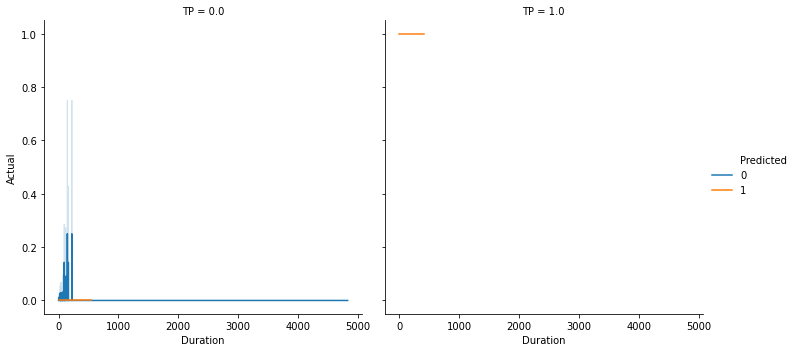

In [ ]:
sns.relplot(x="Duration", y="Actual",hue="Predicted", col='TP', kind="line", data=new_df);
# Duration 

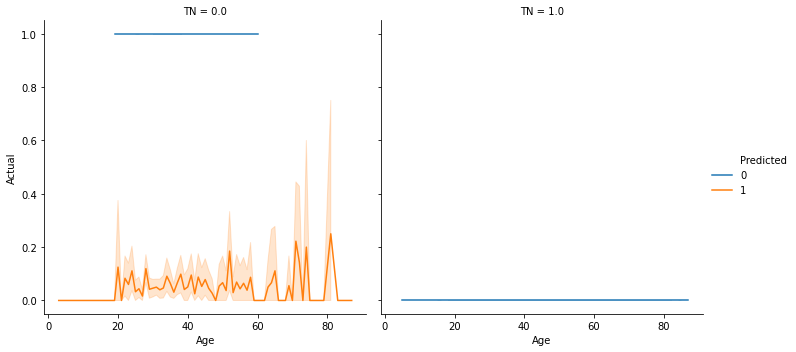

In [ ]:
sns.relplot(x="Age", y="Actual",hue="Predicted", col='TN', kind="line", data=new_df);

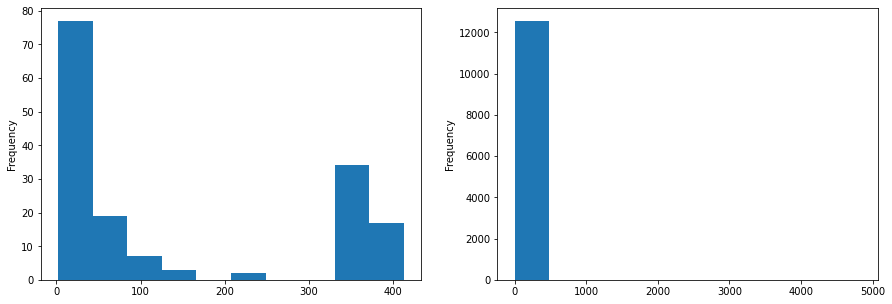

In [ ]:
f, axes = plt.subplots(1, 2)
f.set_size_inches(15,5)
new_dff[new_dff['TP']==1]['Duration'].plot.hist(ax=axes[0])
new_dff[new_dff['TN']==1]['Duration'].plot.hist(ax=axes[1])
# Duration ranges from 0-15 and 350-400 for TP 
# Duration ranges from 0-400 for TN

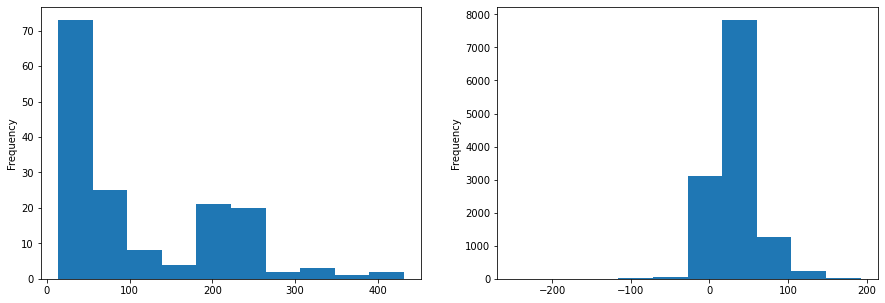

In [ ]:
f, axes = plt.subplots(1, 2)
f.set_size_inches(15,5)
new_dff[new_dff['TP']==1]['Net Sales'].plot.hist(ax=axes[0])
new_dff[new_dff['TN']==1]['Net Sales'].plot.hist(ax=axes[1])


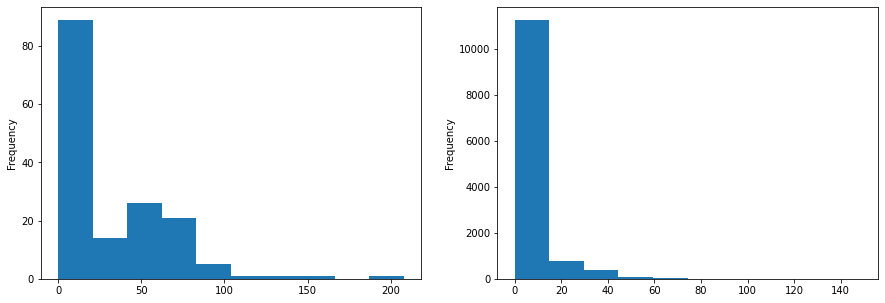

In [ ]:
f, axes = plt.subplots(1, 2)
f.set_size_inches(15,5)
new_dff[new_dff['TP']==1]['Commision (in value)'].plot.hist(ax=axes[0])
new_dff[new_dff['TN']==1]['Commision (in value)'].plot.hist(ax=axes[1])

In [ ]:
con=['TP','TN','FP','FN','Actual','Predicted','Commision (in value)', 'Net Sales','Duration','Age']
l_n=h.copy()
for i in con:
  l_n.remove(i)
ll=iter(l_n)

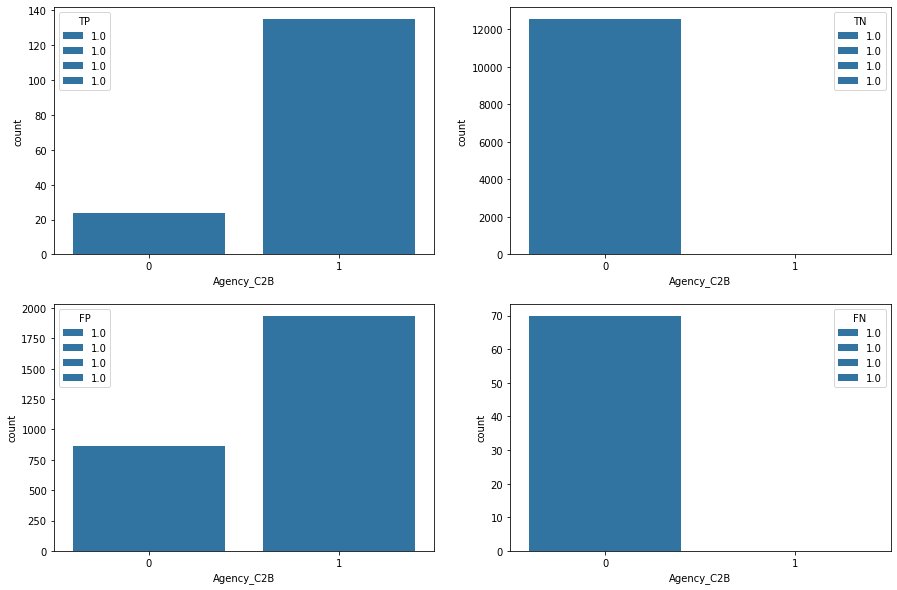

In [ ]:
# Calling plot_buk(val,new_dff) which plots the following 4 graphs
plot_buk(next(ll),new_dff)
#From TP & FP, Prediction is 1 when Agency_C2B is 1 i.e present (Correctly predicted)
#From TN & FN, Prediction is 1 when Agency_C2B is 0 i.e not present

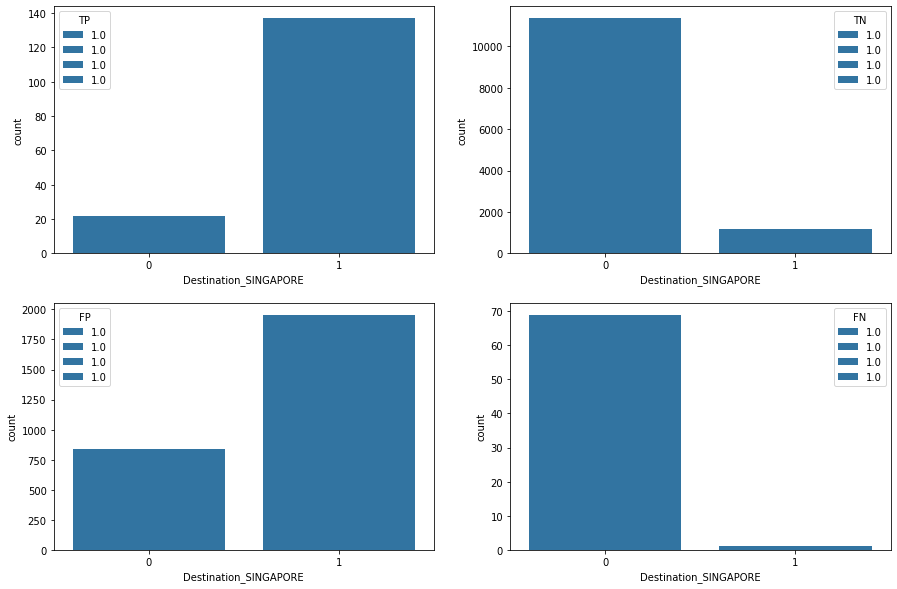

In [ ]:
plot_buk(next(ll),new_dff)
#From TP & FP, Prediction is 1 when Destination_SINGAPORE is 1 i.e present (Correctly predicted)
#From TN & FN, Prediction is 1 when Destination_SINGAPORE is 0 i.e not present 

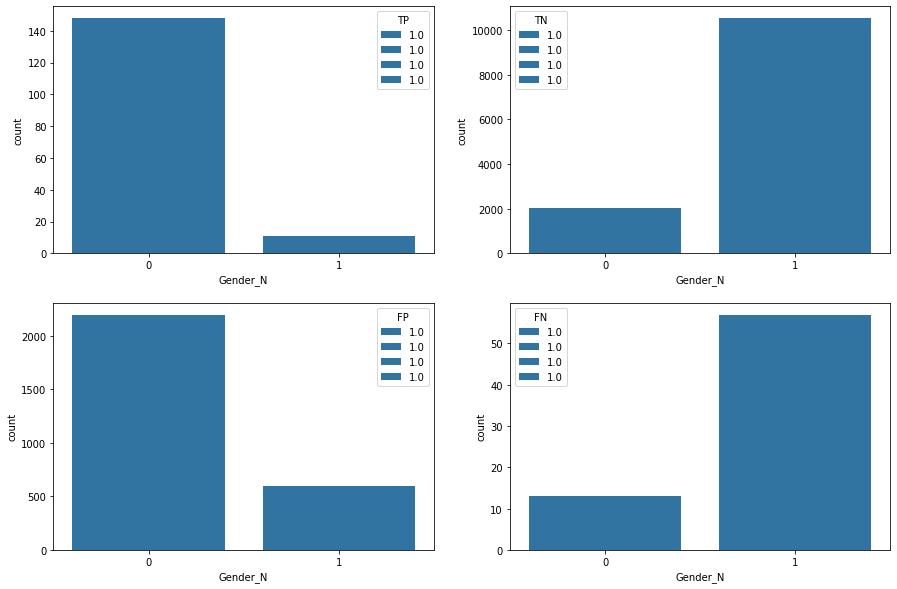

In [ ]:
plot_buk(next(ll),new_dff)
#From TP & FP, Gender_N is not present then the prediciton will be '1' i.e. not present 
#From TN & FN, Prediction is 1 when Gender_N is 1 i.e present (Correctly predicted)

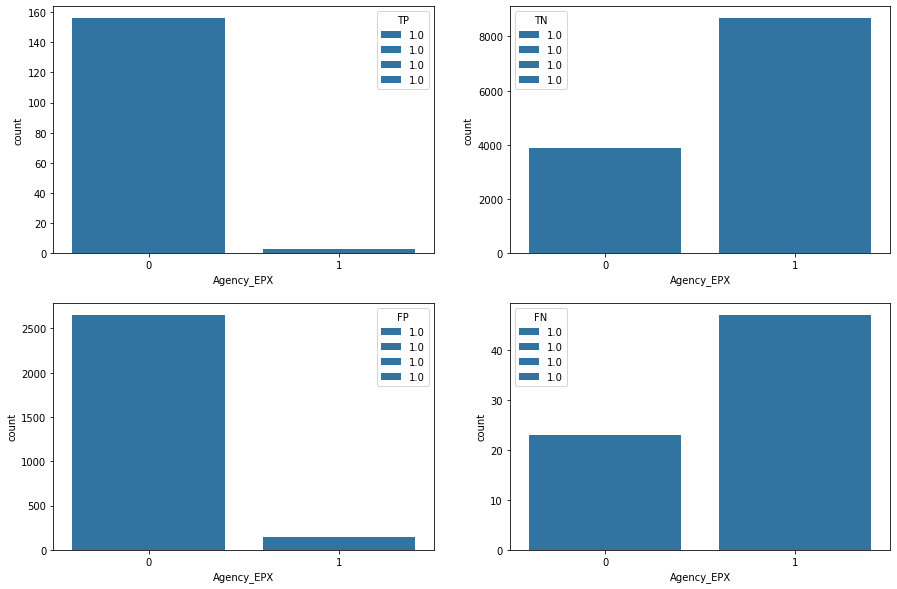

In [ ]:
plot_buk(next(ll),new_dff)
# By the plot of TP & FP , it can be concluded that if Agency_EPX is not presnet then the prediciton will lead to 1 
#From TN & FN, Prediction is 1 when Agency_EPX is 1 i.e present (Correctly predicted)

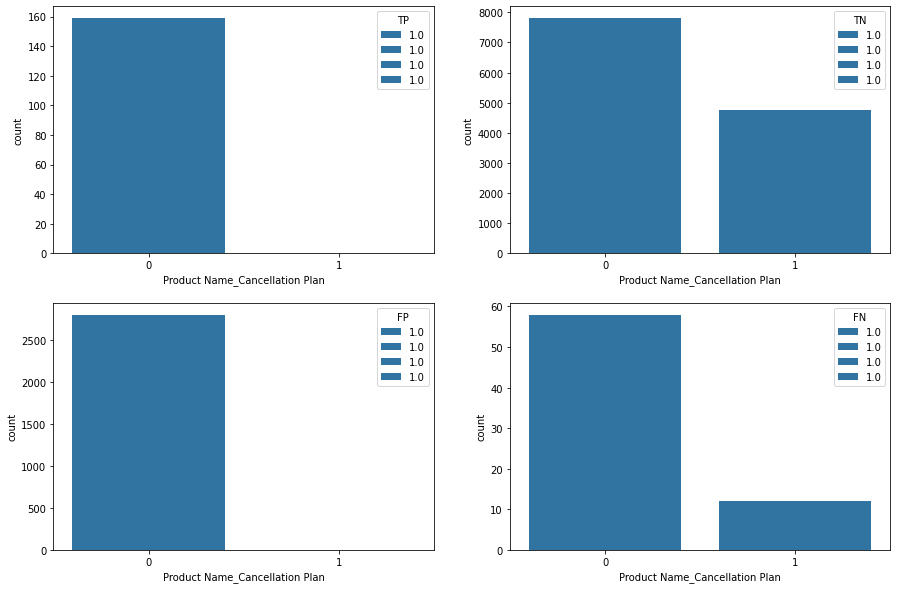

In [ ]:
plot_buk(next(ll),new_dff)
# From TP & FP, Prediction is 1 when Product Name_Cancellation_Plan is 0 i.e not present
#From Tn, it's hard to comment on the prediction since both 0 & 1 is almost present in equal amounts
#From FN, Prediction is 1 when Product Name_Cancellation Plan is 0 i.e not present

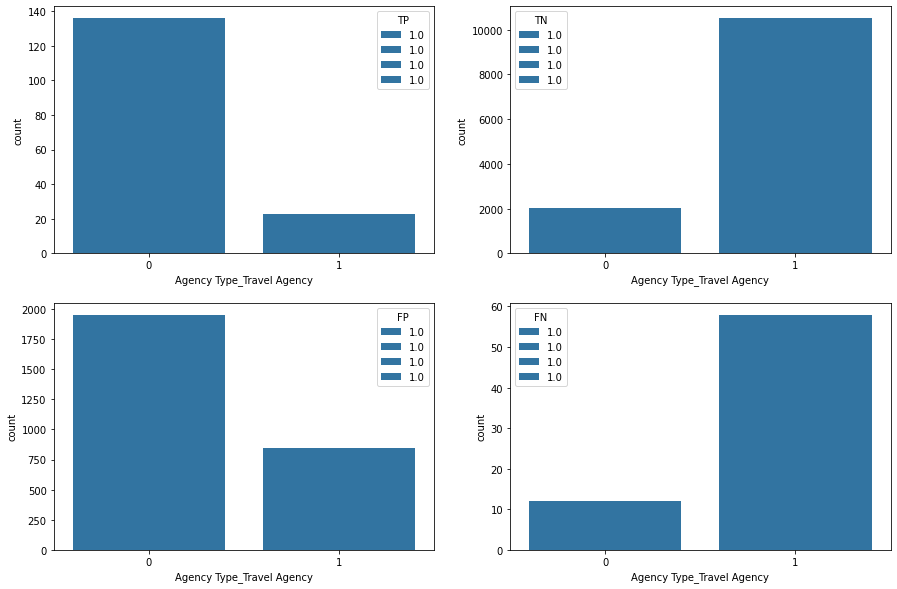

In [ ]:
plot_buk(next(ll),new_dff)
# From TP & FP, Prediction is again 1 when Agency Type_Travel Agency is 0 i.e not present
#From TN & FN, Prediction is 1 when Agency Type_Travel AGency is 1 i.e present (Correctly predicted)

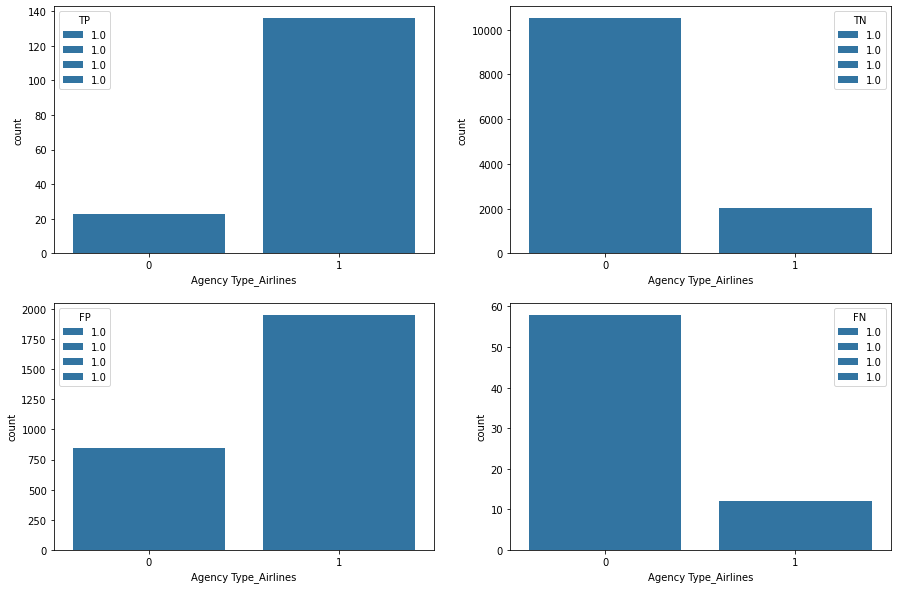

In [ ]:
plot_buk(next(ll),new_dff)
#From TP & FP, Prediction is 1 when Agency Type_Airlines is 1 i.e present (Correctly Predicted)
#From TN & FN, Prediction is 1 when Agency Type_Airlines is 0 i.e not present

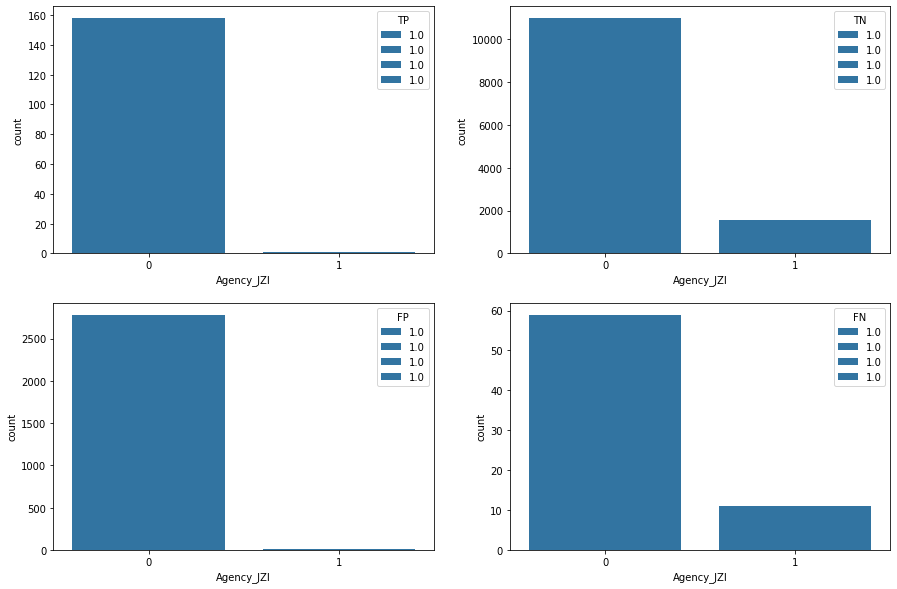

In [ ]:
plot_buk(next(ll),new_dff)
#From all the 4 buckets, Prediction is 1 when Agency_JZI is 0 i.e not present

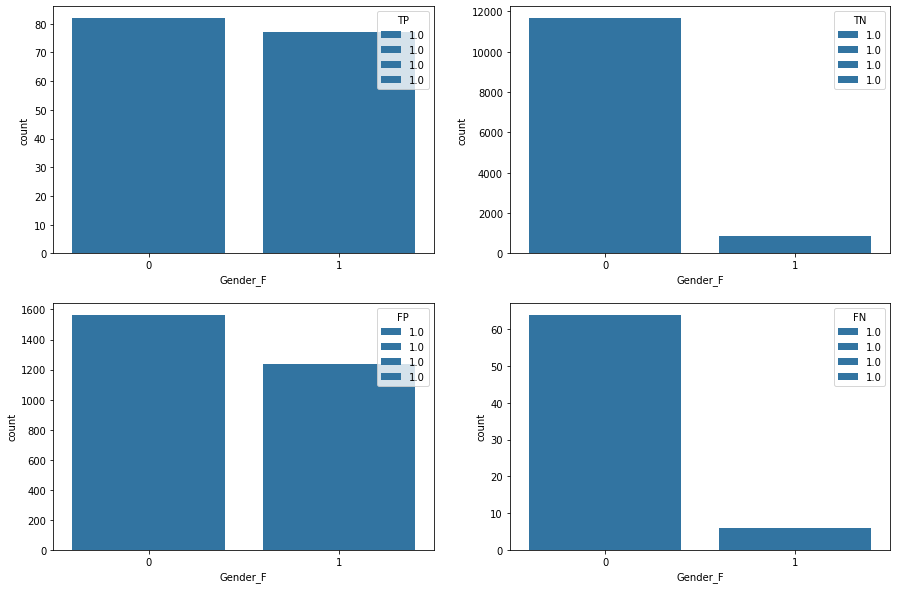

In [ ]:
plot_buk(next(ll),new_dff)
#From TP & FP, it's hard to comment on prediction because both 0 & 1 is almost presnt in equal amounts
#From TN & FN, Prediction is 1 when Gender_F is 0 i.e not present

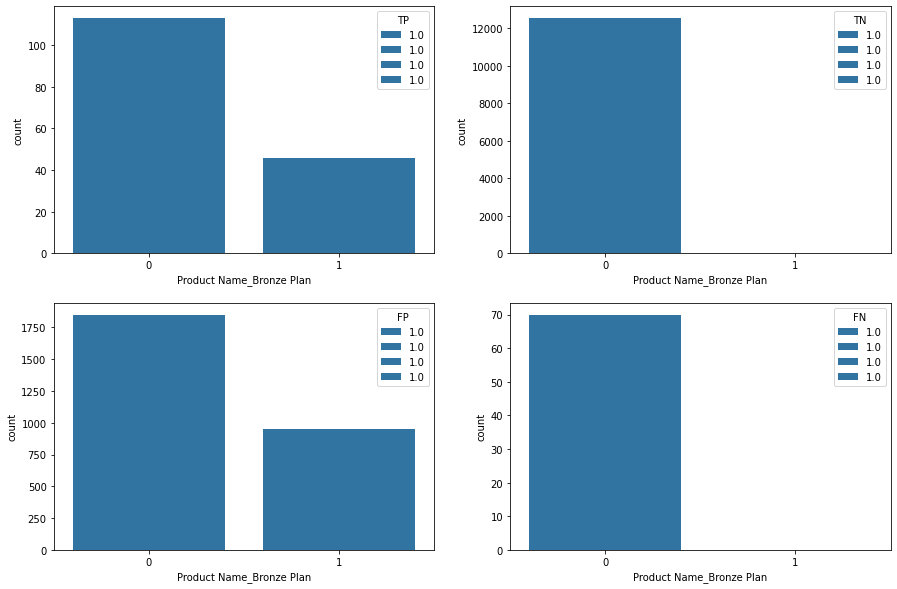

In [ ]:
plot_buk(next(ll),new_dff)
#From all 4 buckets, Prediction is 1 when Product Name_Bronze Plan is 0 i.e not present

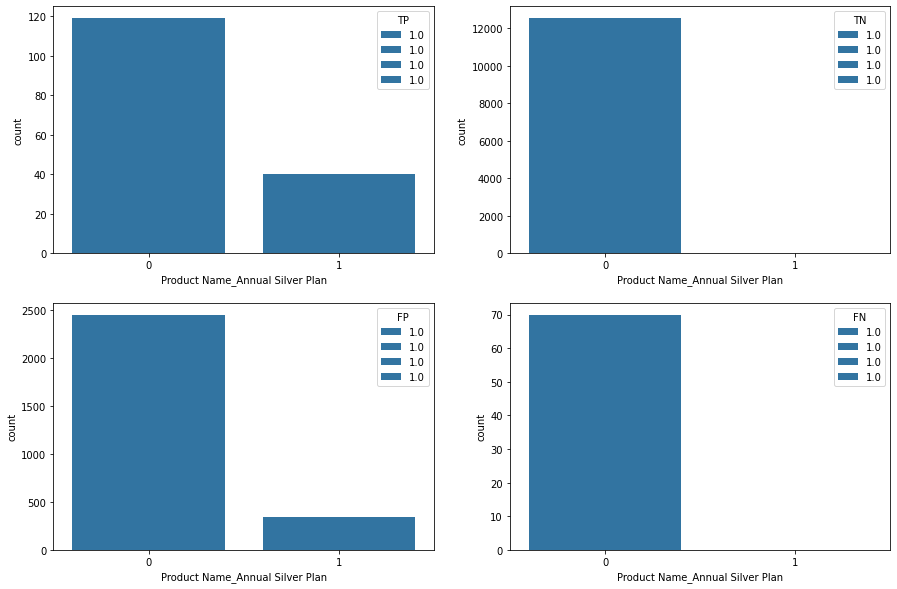

In [ ]:
plot_buk(next(ll),new_dff)
#From all 4 buckets, Prediction is 1 when Product Name_Annual Silver Plan is 0 i.e not present

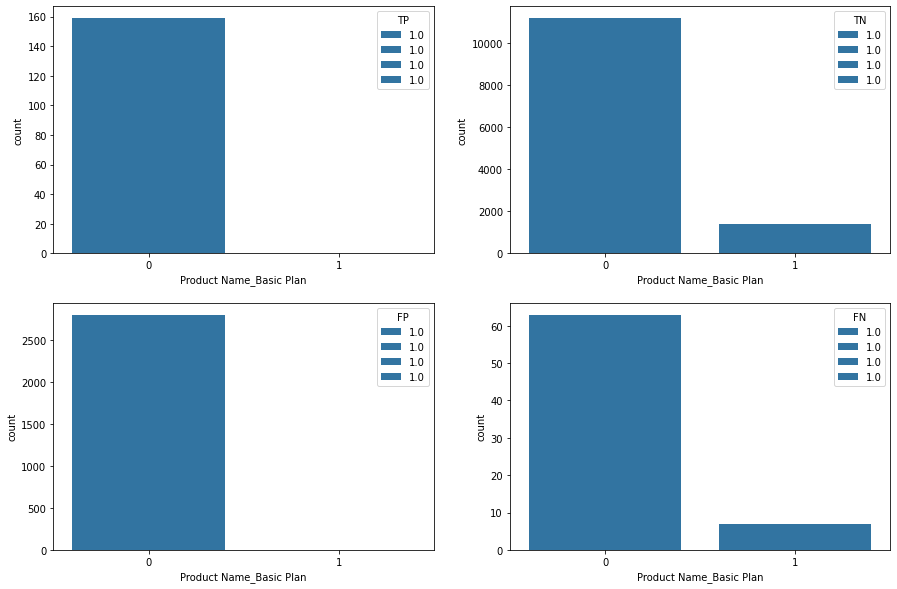

In [ ]:
plot_buk(next(ll),new_dff)
#From all 4 buckets, Prediction is 1 when Product Name_Basic Plan is 0 i.e not present

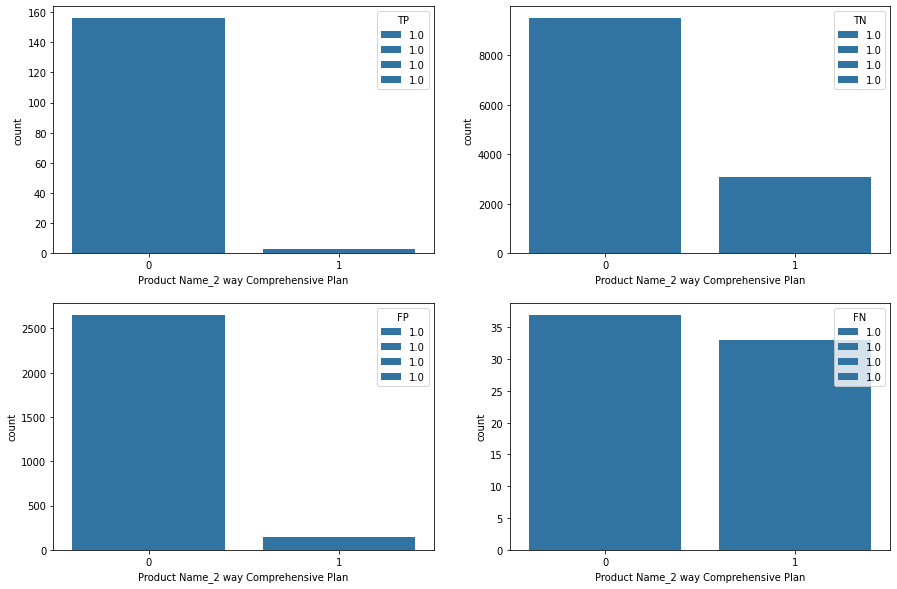

In [ ]:
plot_buk(next(ll),new_dff)
#From TP, FP, TN, Prediction is 1 when Product Name_2 way Comprehensive Plan is 0 i.e not present
#But in FN, it's hard to comment on the prediction again

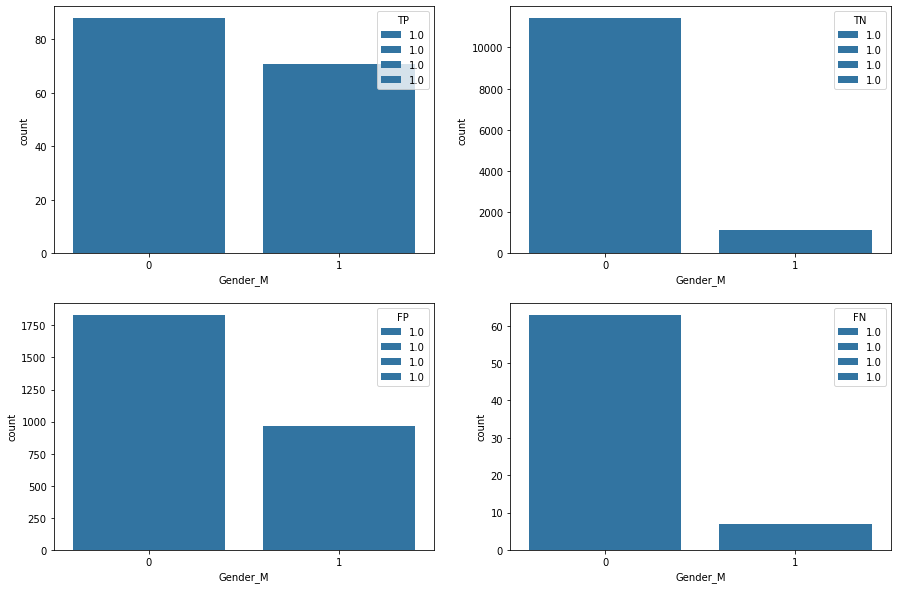

In [ ]:
plot_buk(next(ll),new_dff)
#From FN, FP, TN, Prediction is 1 when Gender_M is 0 i.e not present
#But in TP, it's hard to comment on the prediction again

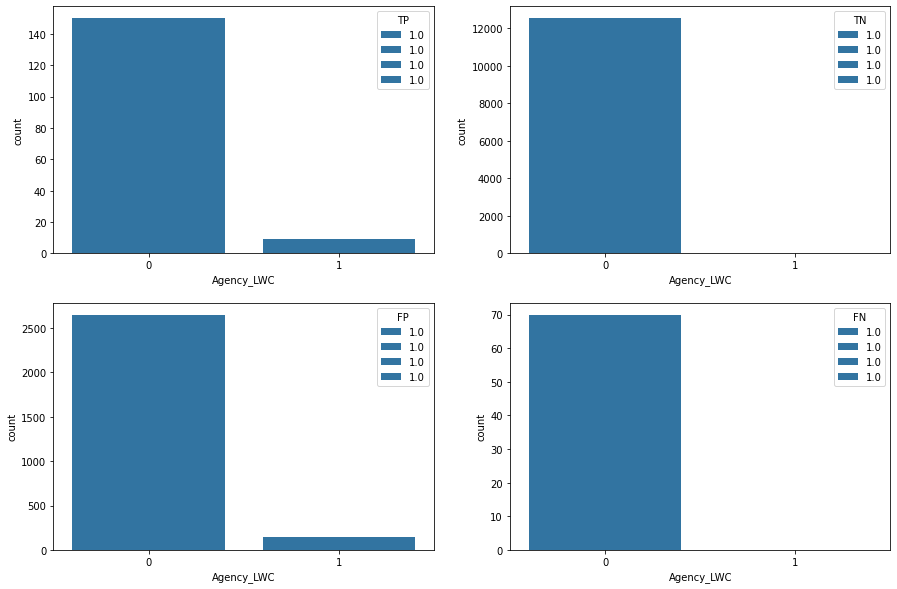

In [ ]:
plot_buk(next(ll),new_dff)
#From all 4 buckets, Prediction is 1 when Agency_LWC is 0 i.e not present